# 資料預處理

In [2]:
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import numpy as np
from collections import Counter
import pickle
import matplotlib.ticker as mticker
import os

def stock_df(stock_name, start, end):
    df = pdr.DataReader(stock_name,'yahoo', start, end)
    df.dropna(inplace=True)
    print(df.tail(5))
    print('Stock_df2csv Done')
    return df

stock_name = '^TWII'
start = dt.datetime(2001,1,1)
end = date.today()
df = stock_df(stock_name, start, end)
df= df[df.Volume != 0]

df.to_csv(stock_name+'.csv') #方便之後讀取用

                    Open          High           Low         Close  \
Date                                                                 
2017-08-24  10414.660156  10488.959961  10410.730469  10488.959961   
2017-08-25  10497.860352  10519.839844  10478.719727  10515.509766   
2017-08-28  10502.799805  10542.370117  10498.879883  10525.980469   
2017-08-29  10518.690430  10518.690430  10463.219727  10496.570313   
2017-08-30  10511.589844  10574.530273  10511.589844  10569.400391   

               Adj Close     Volume  
Date                                 
2017-08-24  10488.959961  2634900.0  
2017-08-25  10515.509766  2742000.0  
2017-08-28  10525.980469  2655900.0  
2017-08-29  10496.570313  2731300.0  
2017-08-30  10569.400391        0.0  
Stock_df2csv Done


In [3]:
df = pd.read_csv(stock_name+'.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,4460.569824,4553.109863,4431.189941,4524.870117,4524.870117,3332000.0
1,2003-01-03,4618.240234,4641.459961,4602.240234,4626.319824,4626.319824,4723600.0
2,2003-01-06,4653.990234,4710.310059,4635.870117,4689.859863,4689.859863,4714400.0
3,2003-01-07,4759.810059,4776.149902,4695.439941,4701.080078,4701.080078,5686800.0
4,2003-01-08,4722.990234,4859.779785,4722.990234,4836.930176,4836.930176,6280200.0


In [4]:
cols = ['Close']
df = df[cols]

# 加上回溯輪轉data

In [5]:
for i in range(10):
    new_col = 'Close_t-'+str(i+1)
    df[new_col] = df['Close'].shift(i+1)

In [6]:
df

,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,Close_t-9,Close_t-10
0,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN,NaN
5,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN,NaN
6,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN,NaN
7,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN,NaN
8,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN,NaN
9,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117,NaN


In [7]:
df.dropna(inplace=True)

In [8]:
df.head()

,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,Close_t-9,Close_t-10
10,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824,4524.870117
11,4907.779785,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863,4626.319824
12,4951.029785,4907.779785,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078,4689.859863
13,4945.870117,4951.029785,4907.779785,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176,4701.080078
14,4993.270020,4945.870117,4951.029785,4907.779785,4943.290039,5017.700195,4992.419922,4991.259766,4850.799805,4813.729980,4836.930176


In [9]:
df_values = np.array(df)

In [10]:
train_feature = df_values[:3000,1:]
train_label = df_values[:3000,0]

test_feature = df_values[3000:3606,1:]
test_label = df_values[3000:3606,0]

In [11]:
train_feature[0]

array([ 5017.700195,  4992.419922,  4991.259766,  4850.799805,
        4813.72998 ,  4836.930176,  4701.080078,  4689.859863,
        4626.319824,  4524.870117])

In [12]:
train_label[0]

4943.2900390000004

## 大數字必備scaler，請估算好矩陣！！

In [13]:
from sklearn import preprocessing
def min_max_pro_feat(data, n):
    global min_max_scaler
    min_max_scaler = preprocessing.MinMaxScaler()
    data = min_max_scaler.fit_transform(data.reshape(-1,int(n)))
    return data

def min_max_pro_lab(data):
    global min_max_scaler
    min_max_scaler = preprocessing.MinMaxScaler()
    data = min_max_scaler.fit_transform(data.reshape(-1,1))
    return data

train_feature_trans = min_max_pro_feat(train_feature, 10)
train_label_trans = min_max_pro_lab(train_label)

test_feature_trans = min_max_pro_feat(test_feature, 10)
test_label_trans = min_max_pro_lab(test_label)

In [14]:
train_feature_trans[0]

array([ 0.16219902,  0.15777935,  0.15757652,  0.13302037,  0.12653958,
        0.13059559,  0.10684537,  0.10488377,  0.09377528,  0.07603916])

In [15]:
train_label_trans[0]

array([ 0.14919014])

In [16]:
train_label_trans.shape

(3000, 1)

# 跑模型: 回歸不用activation!! 會不準

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1000)              11000     
_________________________________________________________________
dropout_16 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 700)               700700    
_________________________________________________________________
dropout_17 (Dropout)         (None, 700)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 701       
Total params: 712,401
Trainable params: 712,401
Non-trainable params: 0
_________________________________________________________________
None
Train on 2400 samples, validate on 600 samples
Epoch 1/50
0s - loss: 0.2472 - acc: 8.3333e-04 - val_loss: 0.0393 - val_acc: 0.0000e

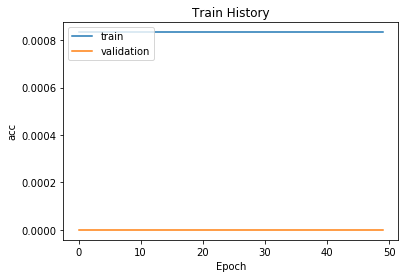

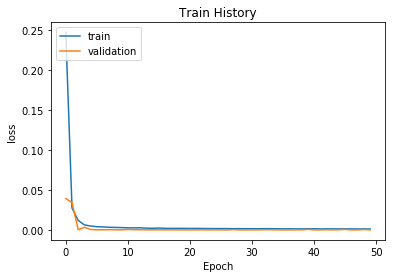


 model saved to disk


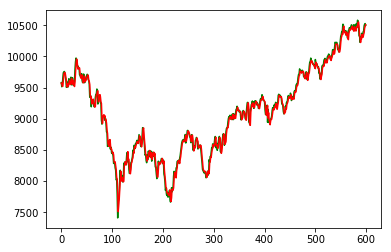

In [54]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()

model.add(Dense(units=1000,
                input_dim=10,
                kernel_initializer='uniform'))
model.add(Dropout(0.5))

model.add(Dense(units=700,
                kernel_initializer='uniform'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

print(model.summary())

model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])

#維度超級奇怪...
train_history =model.fit(train_feature_trans, 
                         train_label_trans, 
                         batch_size=200, epochs=50, verbose=2,
                         validation_split=0.2) 

show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')


######################### 紀錄模型預測情形（答案卷）
prediction_trans = model.predict(test_feature_trans)
prediction = min_max_scaler.inverse_transform(prediction_trans)

#儲存訓練結果
model.save_weights("SaveModel_Keras/StockIndex_MLP.h5")
print('\n model saved to disk')


plt.plot(test_label, c='g')
plt.plot(prediction, c='r')
plt.show()

In [49]:
prediction

array([[  9558.08203125],
       [  9557.19433594],
       [  9511.18945312],
       [  9510.99121094],
       [  9605.14648438],
       [  9691.39355469],
       [  9728.31152344],
       [  9739.05273438],
       [  9711.36132812],
       [  9649.26464844],
       [  9600.32421875],
       [  9504.60546875],
       [  9493.13964844],
       [  9550.10449219],
       [  9506.        ],
       [  9559.671875  ],
       [  9616.18847656],
       [  9561.5078125 ],
       [  9540.875     ],
       [  9588.31933594],
       [  9626.4453125 ],
       [  9623.99609375],
       [  9544.90625   ],
       [  9607.09570312],
       [  9562.15039062],
       [  9530.6953125 ],
       [  9516.99316406],
       [  9578.79101562],
       [  9726.20605469],
       [  9874.15917969],
       [  9940.64160156],
       [  9939.42578125],
       [  9845.12695312],
       [  9788.97167969],
       [  9807.50390625],
       [  9799.10839844],
       [  9797.25878906],
       [  9710.70410156],
       [  96

In [55]:
for i in range(598):
    print(prediction[i]-test_label[i])

[-9.65722656]
[ 60.87109375]
[-18.99609375]
[-132.22265625]
[-126.23535156]
[-41.44042969]
[-21.2578125]
[ 12.20898438]
[ 50.00097656]
[ 39.42773438]
[ 103.11328125]
[-7.98339844]
[-77.18457031]
[ 51.98535156]
[-74.62890625]
[-66.29882812]
[ 43.10449219]
[ 16.80566406]
[-69.81347656]
[-81.87695312]
[ 5.8046875]
[ 92.55664062]
[-104.87695312]
[ 45.74707031]
[ 16.23632812]
[ 18.66699219]
[-96.24609375]
[-207.57519531]
[-167.31054688]
[-98.14648438]
[ 0.55566406]
[ 83.69140625]
[ 29.04589844]
[-50.69726562]
[-10.89941406]
[-2.98828125]
[ 108.56738281]
[ 27.30761719]
[ 21.92773438]
[-32.82128906]
[-56.76660156]
[ 93.640625]
[ 49.11816406]
[-26.88378906]
[-141.0703125]
[-2.92675781]
[ 104.08203125]
[-42.76171875]
[-35.79394531]
[-48.04394531]
[-38.64160156]
[-41.34960938]
[ 1.32324219]
[ 66.13769531]
[ 7.36621094]
[ 43.9765625]
[ 202.67382812]
[ 45.57714844]
[-38.74609375]
[ 155.44238281]
[-60.89257812]
[-31.09277344]
[-13.02246094]
[ 54.81835938]
[ 37.2734375]
[ 22.77246094]
[-31.20800781]

In [56]:
sum_ = 0
for i in range(598):
    delta = prediction[i]-test_label[i]
    sum_ += abs(delta)
print(sum_/598)

[ 58.88702011]


In [57]:
abs(prediction[0]-test_label[0])

array([ 9.65722656], dtype=float32)

In [58]:
prediction[-1]

array([ 10508.20898438], dtype=float32)